# <center> **PROJECT-2. Анализ вакансий из HeadHunter**

<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

### **ОРГАНИЗАЦИОННАЯ ИНФОРМАЦИЯ**

Проект включает в себя шесть этапов:

`1.` **Знакомство с данными**;

`2.` **Предварительный анализ данных**;

`3.` **Детальный анализ вакансий**;

`4.` **Анализ работодателей**;

`5.` **Предметный анализ**;

`6.` **Финал**.

Импортируем библиотеки

In [1]:
# Для работы с данными
import pandas as pd # для вывода результата запроса
import psycopg2 # для подключения к PostgreSQL
import urllib.parse as req # для открытия url-адреса

# Для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

Создаём соединение с заданными параметрами:

In [3]:
connection = psycopg2.connect(
    dbname = DBNAME,
    user = USER,
    host = HOST,
    password = PASSWORD,
    port = PORT
)

## <center> **`1.` Введение. Знакомство с данными**

#### <center> ИСПОЛЬЗУЕМЫЕ ТАБЛИЦЫ:

**VACANCIES**

Таблица хранит в себе данные по вакансиям и содержит следующие столбцы:
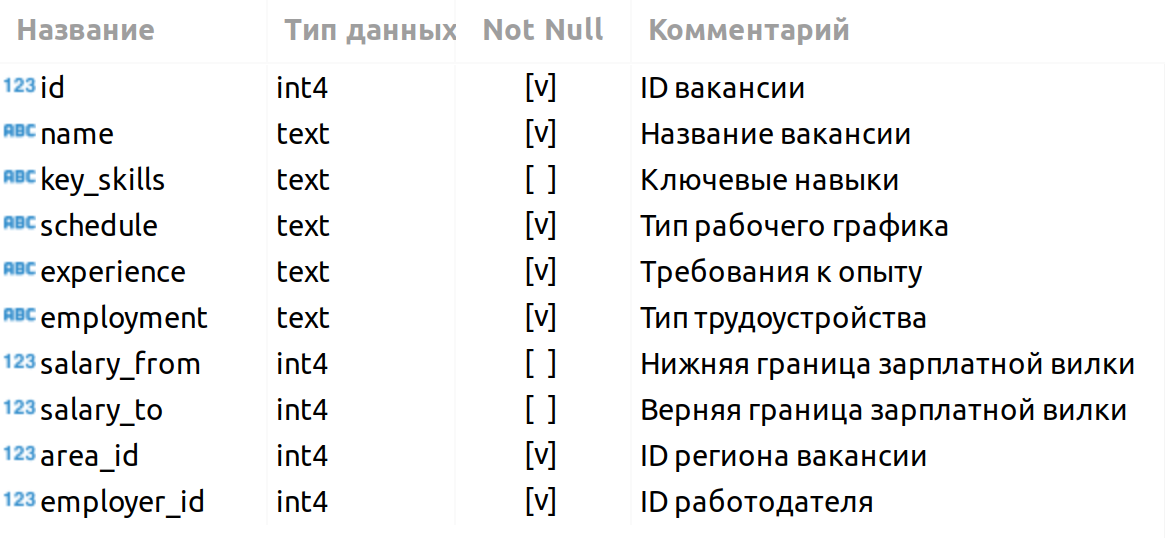

**AREAS**

Таблица-справочник, которая хранит код региона и его название.
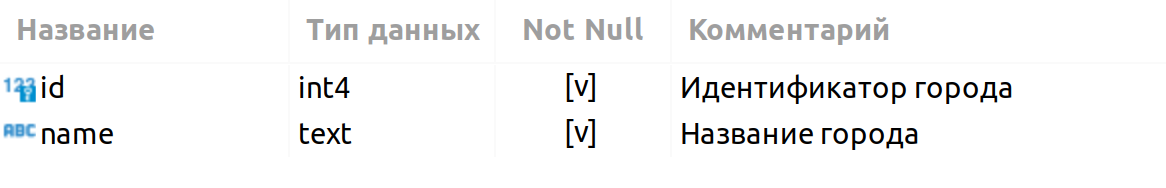

**EMPLOYERS**

Таблица-справочник со списком работодателей.
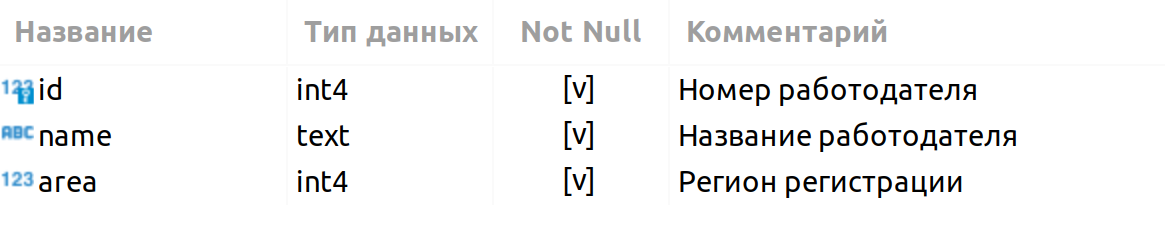

**INDUSTRIES**

Таблица-справочник вариантов сфер деятельности работодателей.
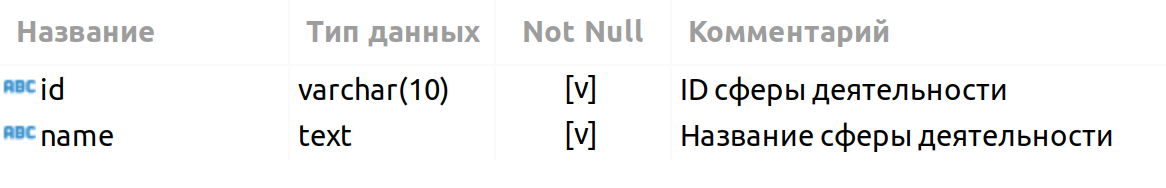

**EMPLOYERS_INDUSTRIES**

Дополнительная таблица, которая существует для организации связи между работодателями и сферами их деятельности.
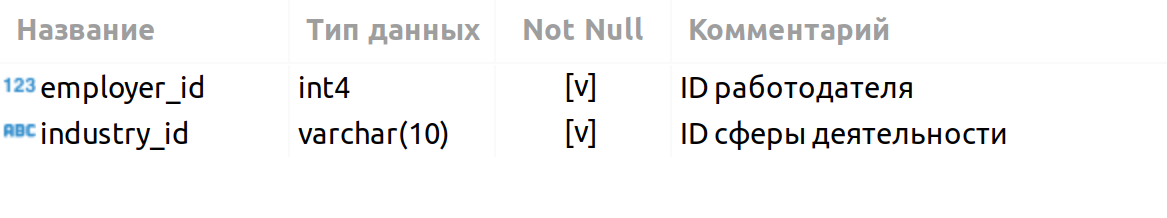

## <center> **`2.` Предварительный анализ данных**

#### $2.1$ 
Подсчитаем количество вакансий в базе. 

In [4]:
# Текст запроса
query_2_1 = f'''SELECT
                    COUNT(*)
                FROM public.vacancies
            '''
             
# Результат запроса
result_2_1 = pd.read_sql_query(query_2_1, connection)
result_2_1

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/936027586.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_2_1 = pd.read_sql_query(query_2_1, connection)


,count
0,49197


#### $2.2$ 
Подсчитаем количество работодателей.

In [5]:
# Текст запроса
query_2_2 = f'''SELECT 
                    COUNT(*)
                FROM public.employers
            '''
         
         
# Результат запроса
result_2_2 = pd.read_sql_query(query_2_2, connection)
result_2_2

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/866902916.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_2_2 = pd.read_sql_query(query_2_2, connection)


,count
0,23501


#### $2.3$ 
Подсчитаем количество регионов.

In [6]:
# Текст запроса
query_2_3 = f'''SELECT 
                    COUNT(*)
                FROM public.areas
            '''
                
                
# Результат запроса
result_2_3 = pd.read_sql_query(query_2_3, connection)
result_2_3

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_12908/267166847.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_2_3 = pd.read_sql_query(query_2_3, connection)


,count
0,1362


#### $2.4$ 
Подсчитаем количество сфер деятельности.

In [6]:
# Текст запроса
query_2_4 = f'''SELECT 
                    COUNT(*)
                FROM public.industries
            '''
                     
                    
# Результат запроса
result_2_4 = pd.read_sql_query(query_2_4, connection)
result_2_4

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/2332331706.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_2_4 = pd.read_sql_query(query_2_4, connection)


,count
0,294


**Вывод по детальному анализу вакансий:** 

По результату запроса мы видим, что в базе данных представлено 49197 вакансии, которые включают в себя 294 сферы деятельности в 1362 регионов, а количество компаний-работодателей равно 23501.

## <center> **`3.` Детальный анализ вакансий**

#### $3.1$ 
Подсчитаем количество вакансий в каждом регионе. Выберем пятёрку лидеров по количеству вакансий.

In [7]:
# Текст запроса
query_3_1 = f'''SELECT 
                    a.name "Название города",
                    COUNT(DISTINCT v.name) "Количество вакансий"
                FROM 
                    public.areas a 
                JOIN public.vacancies v ON a.id = v.area_id
                GROUP BY a.name
                ORDER BY COUNT(DISTINCT v.name) DESC
                LIMIT 5
            '''
                 
                   
                   
# Результат запроса
result_3_1 = pd.read_sql_query(query_3_1, connection)
result_3_1

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/35775130.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_3_1 = pd.read_sql_query(query_3_1, connection)


,Название города,Количество вакансий
0,Москва,3894
1,Санкт-Петербург,2143
2,Новосибирск,1501
3,Минск,1497
4,Алматы,1421


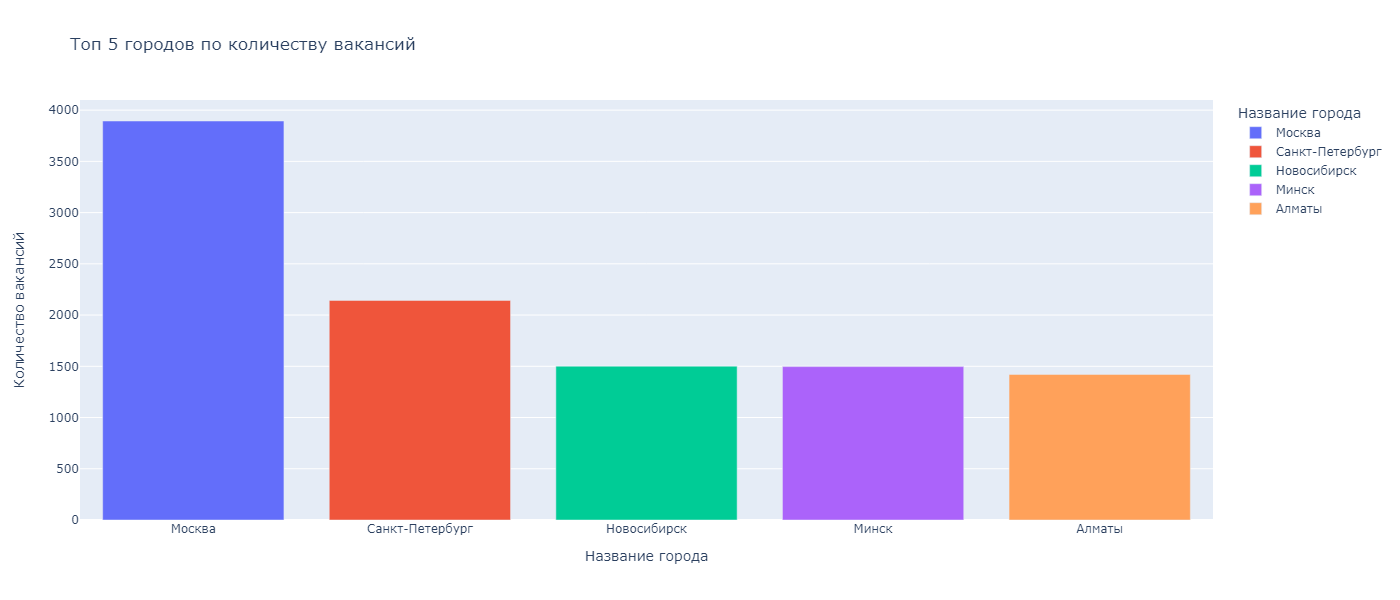

In [9]:
# Строим столбчатую диаграмму
fig = px.bar(
    data_frame = result_3_1,                         # DataFrame
    x = 'Название города',                           # распределение по оси x
    y = 'Количество вакансий',                       # распределение по оси y
    orientation = 'v',                               # вертиуальная ориентация графика
    color = 'Название города',                       # цвет столбцов
    height = 600,                                    # высота
    width = 1400,                                    # ширина
    title = 'Топ 5 городов по количеству вакансий'   # название графика
)

# Выводим график
fig.show('png')

#### $3.2$ 
Подсчитаем количество вакансий, у которых заполнено хотя бы одно из двух полей с зарплатой.

In [8]:
# Текст запроса
query_3_2 = f'''SELECT 
                    COUNT(*)
                FROM public.vacancies
                WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
            '''
                   
                   
# Результат запроса
result_3_2 = pd.read_sql_query(query_3_2, connection)
result_3_2

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/463936161.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_3_2 = pd.read_sql_query(query_3_2, connection)


,count
0,24073


#### $3.3$ 
Подсчитаем средние значения для нижней и верхней границы зарплатной вилки.

In [9]:
# Текст запроса
query_3_3 = f'''SELECT  
                    ROUND(AVG(salary_to)) "Верхняя граница зарплатной вилки",
                    ROUND(AVG(salary_from)) "Нижняя граница зарплатной вилки"
                FROM public.vacancies
            '''
                  
                  
# Результат запроса
result_3_3 = pd.read_sql_query(query_3_3, connection)
result_3_3

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/3284074329.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_3_3 = pd.read_sql_query(query_3_3, connection)


,Верхняя граница зарплатной вилки,Нижняя граница зарплатной вилки
0,110537.0,71065.0


#### $3.4$ 
Подсчитаем количество вакансий для каждого сочетания типа рабочего графика (`schedule`) и типа трудоустройства (`employment`), используемого в вакансиях. Выведем пару, которая находится на втором месте по популярности.

In [10]:
# Текст запроса
query_3_4 = f'''SELECT 
                    COUNT(DISTINCT name) "Количество вакансий",
                    schedule "Тип графика",
                    employment "Тип трудоустройства"
                FROM public.vacancies
                GROUP BY 2, 3
                ORDER BY 1 DESC
                OFFSET 1 LIMIT 1
            '''   
                   
                   
# Результат запроса
result_3_4 = pd.read_sql_query(query_3_4, connection)
result_3_4        

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/70193902.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_3_4 = pd.read_sql_query(query_3_4, connection)


,Количество вакансий,Тип графика,Тип трудоустройства
0,3574,Удаленная работа,Полная занятость


#### $3.5$
Выведем значения поля Требуемый опыт работы (`experience`) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [11]:
# Текст запроса
query_3_5 = f'''SELECT 
                    COUNT(DISTINCT name) "Количество вакансий",
                    experience "Требуемый опыт работы" 
                FROM public.vacancies
                GROUP BY 2
                ORDER BY 1 ASC
            '''
             
             
# Результат запроса
result_3_5 = pd.read_sql_query(query_3_5, connection)
result_3_5

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/1247183752.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_3_5 = pd.read_sql_query(query_3_5, connection)


,Количество вакансий,Требуемый опыт работы
0,871,Более 6 лет
1,3243,Нет опыта
2,7151,От 3 до 6 лет
3,11963,От 1 года до 3 лет


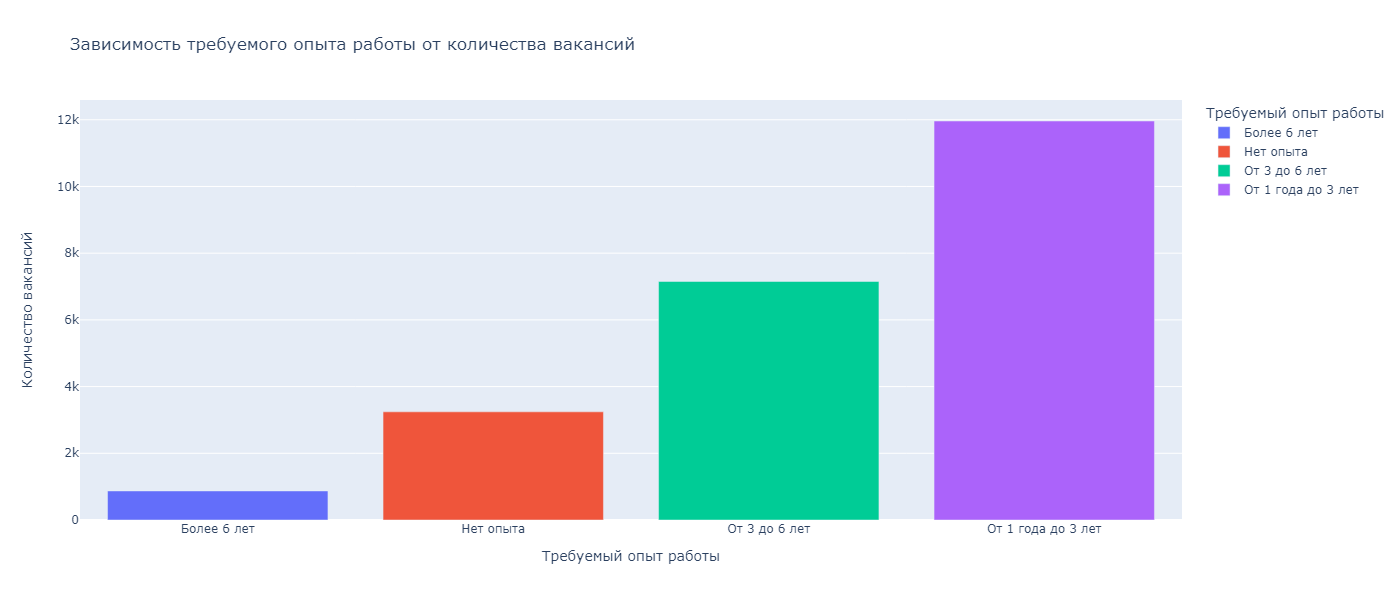

In [14]:
# Строим столбчатую диаграмму
fig = px.bar(
    data_frame = result_3_5,                                               # DataFrame
    x = 'Требуемый опыт работы',                                           # распределение по оси x
    y = 'Количество вакансий',                                             # распределение по оси y
    orientation = 'v',                                                     # вертиуальная ориентация графика
    color = 'Требуемый опыт работы',                                       # цвет графика
    height = 600,                                                          # высота
    width = 1400,                                                          # ширина
    title = 'Зависимость требуемого опыта работы от количества вакансий'   # название графика
)

# Выводим график
fig.show('png')

**Вывод по детальному анализу вакансий:** 

По результатам запроса можно заключить, что лидером по количеству вакансий среди всех городов является Москва (количество вакансий: 3894). Это обусловлено тем, что данный регион является самым большим по количеству населения, а так же самым развитым. Касаемо заработных плат, то значение верхней границы зароплатной вилки составляет 110537 рублей, что на 39472 руб выше нижнего значения (71065 рублей). Также мы видим, что среди соискателей наиболее востребованными являются специалисты со стажем от 1 до 3-х лет, данный показатель можно объяснить тем, что в эту категорию, по большей части, попадают недавно выпустившиеся из учебных заведений специалисты с уже имеющимся стажем.

## <center> **`4.` Анализ работодателей**

#### $4.1$ 
Выведем работодателей, которые находятся на первом и пятом месте по количеству вакансий.

In [12]:
# Текст запроса
query_4_1 = f'''(SELECT 
                    e.name "Название работодателя",
                    COUNT(*) "Количество вакансий" 
                FROM public.employers e
                JOIN public.vacancies v ON e.id = v.employer_id
                GROUP BY e.id
                ORDER BY 2 DESC
                LIMIT 1)    
            
                UNION ALL
            
                (SELECT
                    e.name "Название работодателя",
                    COUNT(*) "Количество вакансий"
                FROM public.employers e
                JOIN public.vacancies v ON e.id = v.employer_id
                GROUP BY e.id
                ORDER BY 2 DESC
                OFFSET 4 LIMIT 1)
            '''
         
         
# Результат запроса
result_4_1 = pd.read_sql_query(query_4_1, connection)
result_4_1

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/1198710402.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_4_1 = pd.read_sql_query(query_4_1, connection)


,Название работодателя,Количество вакансий
0,Яндекс,1933
1,Газпром нефть,331


#### $4.2$ 
Для каждого региона выведем количество работодателей и вакансий в нём. Среди регионов, в которых нет вакансий, найдём тот, в котором наибольшее количество работодателей.

In [13]:
# Текст запроса
query_4_2 = f'''SELECT 
                    a.name "Название региона",
                    COUNT(DISTINCT e.id) "Количество работодателей",
                    COUNT(DISTINCT v.id) "Количество вакансий"
                FROM 
                    public.areas a
                LEFT JOIN public.employers e ON a.id = e.area
                LEFT JOIN public.vacancies v ON a.id = v.area_id
                WHERE v.id IS NULL
                GROUP BY a.id
                ORDER BY 2 DESC
                LIMIT 1
            '''
            
            
# Результат запроса
result_4_2 = pd.read_sql_query(query_4_2, connection)
result_4_2

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/3448111454.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_4_2 = pd.read_sql_query(query_4_2, connection)


,Название региона,Количество работодателей,Количество вакансий
0,Россия,410,0


#### $4.3$ 
Для каждого работодателя посчитаем количество регионов, в которых он публикует свои вакансии. Выберем максимальное значение из получившегося списка.

In [14]:
# Текст запроса
query_4_3 = f'''SELECT 
                    e.name "Название компании",
                    COUNT(DISTINCT v.area_id) "Количество регионов"
                FROM 
                    public.employers e
                JOIN public.vacancies v ON e.id = v.employer_id
                GROUP BY 1
                ORDER BY 2 DESC
                LIMIT 1  
            '''
         
         
# Результат запроса
result_4_3 = pd.read_sql_query(query_4_3, connection)
result_4_3

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/3769833558.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_4_3 = pd.read_sql_query(query_4_3, connection)


,Название компании,Количество регионов
0,Яндекс,181


#### $4.4$
Подсчитаем количество работодателей, у которых не указана сфера деятельности.

In [15]:
# Текст запроса
query_4_4 = f'''SELECT 
                    COUNT(DISTINCT e.id)
                FROM public.employers e
                LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id
                WHERE ei.industry_id IS NULL
            '''
         
         
# Результат запроса
result_4_4 = pd.read_sql_query(query_4_4, connection)
result_4_4

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/4120562649.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_4_4 = pd.read_sql_query(query_4_4, connection)


,count
0,8419


#### $4.5$
Выведем название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [16]:
# Текст запроса
query_4_5 = f'''SELECT 
                    e.name "Название компании",
                    COUNT(ei.industry_id) "Количество сфер деятельности"
                FROM
                    public.employers e
                JOIN public.employers_industries ei ON e.id = ei.employer_id
                GROUP BY 1
                HAVING COUNT(ei.industry_id) = 4
                ORDER BY 1
                OFFSET 2 LIMIT 1
            '''
         
         
# Результат запроса
result_4_5 = pd.read_sql_query(query_4_5, connection)
result_4_5

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/2238099296.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_4_5 = pd.read_sql_query(query_4_5, connection)


,Название компании,Количество сфер деятельности
0,2ГИС,4


#### $4.6$ 
Вычислим количество работодателей, у которых в качестве сферы деятельности указана «Разработка программного обеспечения».

In [17]:
# Текст запроса
query_4_6 = f'''SELECT 
                DISTINCT i.name "Название сферы деятельности",
                COUNT(ei.employer_id) "Количество работодателей"
                FROM 
                    public.industries i 
                JOIN public.employers_industries ei ON i.id = ei.industry_id
                WHERE i.name = 'Разработка программного обеспечения' 
                GROUP BY 1
            '''
         
         
# Результат запроса
result_4_6 = pd.read_sql_query(query_4_6, connection)
result_4_6

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/709310572.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_4_6 = pd.read_sql_query(query_4_6, connection)


,Название сферы деятельности,Количество работодателей
0,Разработка программного обеспечения,3553


#### $4.7$ 
Для компании «`Яндекс`» выведем список регионов-миллионников , в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавим строку Total с общим количеством вакансий компании, собранных в этой таблице.

In [18]:
# Прописываем путь 
path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)

# Читаем таблицу
tables = pd.read_html(url)

# Создаём DataFrame
cities_df = tables[1]

# Создаём список городов-миллионников
cities_list = list(cities_df['Город']) 
cities_list[13] = 'Воронеж'

In [19]:
# Текст запроса
query_4_7 = f'''SELECT
                    a.name "Название региона",
                    COUNT(v.id) "Количество вакансий"
                FROM public.vacancies v 
                JOIN public.areas a ON a.id = v.area_id 
                JOIN public.employers e ON v.employer_id = e.id
                WHERE e.name = 'Яндекс' AND a.name in {tuple(cities_list)}
                GROUP BY 1
                
                UNION ALL
                
                SELECT
                    'Total',
                    COUNT(*)
                FROM public.vacancies v 
                JOIN public.areas a ON a.id = v.area_id 
                JOIN public.employers e ON v.employer_id = e.id
                WHERE e.name = 'Яндекс' AND a.name in {tuple(cities_list)}
                
                ORDER BY 2
            '''
            
            
# Результат запроса
result_4_7 = pd.read_sql_query(query_4_7, connection)
result_4_7

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/4290740744.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_4_7 = pd.read_sql_query(query_4_7, connection)


,Название региона,Количество вакансий
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


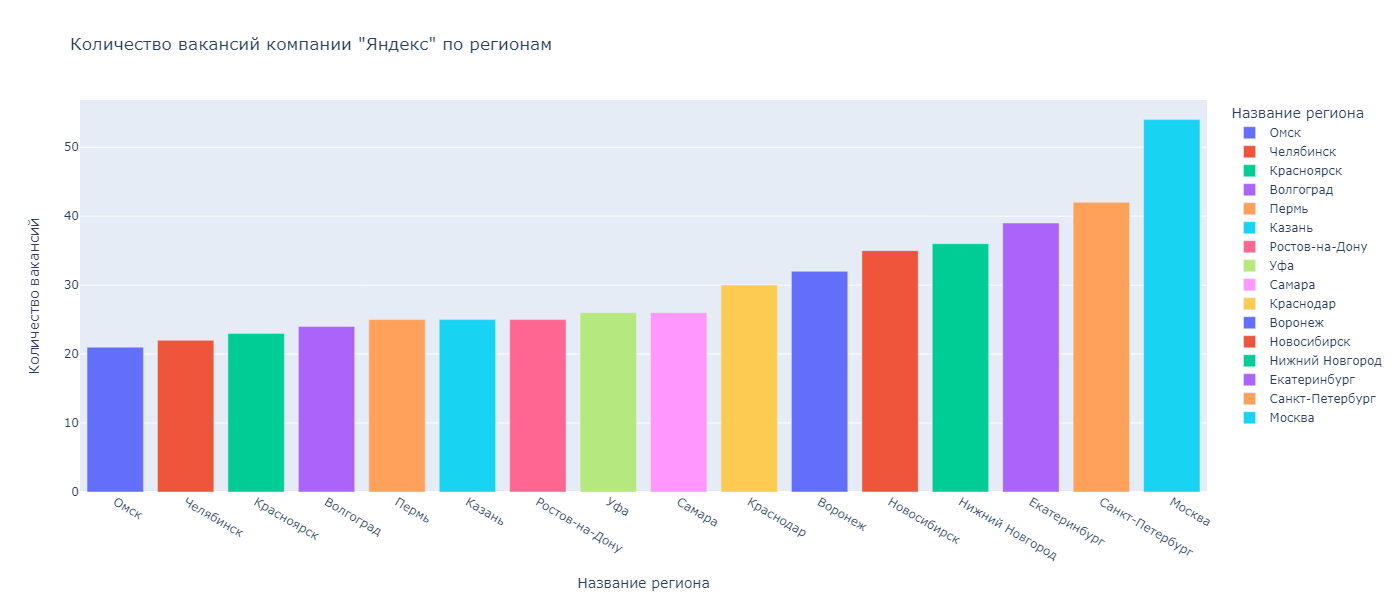

In [24]:
# Для лучшего отображения количества вакансий на диаграмме создадим датафрейм без строки "Total", и передадим его в код графика
vacancies_by_cities = result_4_7.drop(labels=[16], axis=0)

# Строим столбчатую диаграмму
fig = px.bar(
    data_frame = vacancies_by_cities,                            # DataFrame
    x = 'Название региона',                                      # распределение по оси x
    y = 'Количество вакансий',                                   # распределение по оси y
    orientation = 'v',                                           # вертиуальная ориентация графика
    color = 'Название региона',                                  # цвет графика           
    height = 600,                                                # высота
    width = 1400,                                                # ширина
    title = 'Количество вакансий компании "Яндекс" по регионам'  # название графика
)

# Выводим график
fig.show('png')

**Вывод по анализу работодателей:** 

По полученным данным мы видим, что среди всех работодателей (23501 компания) на первом месте по числу вакансий находится компания *"Яндекс"* с количеством вакансий 1933, эта же компания охватывает наибольшее число регионов. Такой результат можно объяснить как масштабами самой компании, так и количеством вакансий и позиций на различные должности. Что касается до самих регионов, в которых *"Яндекс"* размещает объявления, то среди представленных городов, наибольшее число вакансий компании в количестве 54-х размещено в Москве. Данный показатель можно объяснить в основном количеством населения данного региона (по количеству населения Москва занимает первое место), а следовательно, количество соискателей тут будет так же наибольшее. 

## <center> **`5.` Предметный анализ**

#### $5.1$ 
Вычислим количество вакансий, которые имеют отношения к данным.

In [20]:
# Текст запроса
query_5_1 = f'''SELECT
                    COUNT(*)
                FROM public.vacancies
                WHERE LOWER(name) LIKE '%data%' OR LOWER(name) LIKE '%данн%'
            '''
             
        
# Результат запроса
result_5_1 = pd.read_sql_query(query_5_1, connection)
result_5_1

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/1809405159.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_5_1 = pd.read_sql_query(query_5_1, connection)


,count
0,1771


#### $5.2$ 
Вычислим количество вакансий для начинающего дата-сайентиста

In [21]:
# Текст запроса
query_5_2 = f'''SELECT 
                    COUNT(*)
                FROM public.vacancies
                WHERE ((name ILIKE '%data scientist%')
                    OR (name ILIKE '%data science%')
                    OR (name ILIKE '%исследователь данных%')
                    OR (name ILIKE '%machine learning%')
                    OR (name ILIKE '%машинн%обучен%%')
                    OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
                    )
                
                    AND
                
                      ((name ILIKE '%junior%')
                    OR (experience = 'Нет опыта')
                    OR (employment = 'Стажировка'))
            '''
         
         
# Результат запроса
result_5_2 = pd.read_sql_query(query_5_2, connection)
result_5_2

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/642929972.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_5_2 = pd.read_sql_query(query_5_2, connection)


,count
0,51


#### $5.3$ 
Вычислим количество вакансий для *DS*, в которых в качестве ключевого навыка указан *SQL* или *postgres*

In [22]:
# Текст запроса
query_5_3 = f'''SELECT 
                    COUNT(*)
                FROM public.vacancies
                WHERE ((name ILIKE '%data scientist%')
                    OR (name ILIKE '%data science%')
                    OR (name ILIKE '%исследователь данных%')
                    OR (name ILIKE '%machine learning%')
                    OR (name ILIKE '%машинн%обучен%%')
                    OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
                    )
                
                AND
                
                    (key_skills LIKE '%SQL%' OR key_skills LIKE '%postgres%')
            '''
         
         
# Результат запроса
result_5_3 = pd.read_sql_query(query_5_3, connection)
result_5_3

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/640358742.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_5_3 = pd.read_sql_query(query_5_3, connection)


,count
0,201


#### $5.4$ 
Вычислим количество вакансий, в которых в качестве ключевого навыка указан *Python*

In [23]:
# Текст запроса
query_5_4 = f'''SELECT 
                    COUNT(*)
                FROM public.vacancies
                WHERE ((name ILIKE '%data scientist%')
                    OR (name ILIKE '%data science%')
                    OR (name ILIKE '%исследователь данных%')
                    OR (name ILIKE '%machine learning%')
                    OR (name ILIKE '%машинн%обучен%%')
                    OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
                    )
                
                AND
                
                    (key_skills LIKE '%Python%')
            '''
            
            
# Результат запроса
result_5_4 = pd.read_sql_query(query_5_4, connection)
result_5_4

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/2305784674.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_5_4 = pd.read_sql_query(query_5_4, connection)


,count
0,351


#### $5.5$ 
Вычислим количество ключевых навыков, которые среднем указывают в вакансиях для *DS*. Ответ округлим до двух знаков после точки-разделителя.

In [24]:
# Текст запроса
query_5_5 = f'''SELECT 
                    ROUND(AVG(LENGTH(key_skills) - LENGTH(replace(key_skills, CHR(9), '')) + 1 ), 2)
                FROM public.vacancies
                WHERE ((name ILIKE '%data scientist%')
                    OR (name ILIKE '%data science%')
                    OR (name ILIKE '%исследователь данных%')
                    OR (name ILIKE '%machine learning%')
                    OR (name ILIKE '%машинн%обучен%%')
                    OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
                    )
                
                    AND NOT key_skills IS NULL
            '''
         
         
# Результат запроса
result_5_5 = pd.read_sql_query(query_5_5, connection)
result_5_5

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/2134026866.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_5_5 = pd.read_sql_query(query_5_5, connection)


,round
0,6.41


#### $5.6$ 
Вычислим зарплату для *DS*, которую в среднем указывают для каждого типа требуемого опыта.

In [25]:
# Текст запроса
query_5_6 = f'''SELECT 
                    experience "Требуемый опыт",
                    ROUND((AVG(coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from))) / 2) "Средняя зарплата"
                FROM public.vacancies
                WHERE ((name ILIKE '%data scientist%')
                OR (name ILIKE '%data science%')
                OR (name ILIKE '%исследователь данных%')
                OR (name ILIKE '%machine learning%')
                OR (name ILIKE '%машинн%обучен%%')
                OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
                )
                
                GROUP BY 1
            '''
             
             
# Результат запроса
result_5_6 = pd.read_sql_query(query_5_6, connection)
result_5_6

C:\Users\ilyaz\AppData\Local\Temp/ipykernel_4564/54824863.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_5_6 = pd.read_sql_query(query_5_6, connection)


,Требуемый опыт,Средняя зарплата
0,Более 6 лет,NaN
1,Нет опыта,74643.0
2,От 1 года до 3 лет,139675.0
3,От 3 до 6 лет,243115.0


**Вывод по предметному анализу:** 

Из результата запроса мы видим, что среди 49197 вакансий, представленных в базе, к данным имеют отношения только 1771 вакансия, среди которых 51 относится непосредственно к начинающему дата-сайентисту. Среди ключевых навыков прописанных в более чем 200 вакансиях, которыми должен обладать DS выделяются владение SQL или postgres а так же обязательное владение языком Python. Что до заработных плат, то средняя зп начинающего DS равна 74643 рубля, по достижении опыта от 1 года: 139675 рублей а специалисты со стажем от 3 до 6 лет могут зарабатывать от 243115 рублей в месяц. Такие высокие доходы можно объяснить высокой востребованностью квалифицированных специалистов по данным, которая с каждым годом становится только выше и будет расти в ближайшей перспективе.

## <center> **Общий вывод по проекту**

В ходе работы над проектом были проведены следующие исследования базы данных: вычислили общее количество вакансий, их количество по компаниям, регионам; исследовали работодателей, их количество, распределение по количеству вакансий; а так же отдельно провели исследование вакансий по профессии Data Scientist. В дальнейшем можно провести углубленное исследование наиболее востребованных вакансий, их количество по регионам, вилку зп.

## <center> **`6.` Финал**

In [4]:
# Закрываем соединение
connection.close()